In [ ]:
# 비정형데이터분석 기말 프로젝트

In [ ]:
# 시민들에게 불안감을 주고 있는 싱크홀에 대한 뉴스 분석

In [43]:
# 싱크홀은 지반이 약화 되어 일어 나는 현상으로 이러한 지반 약화는 지하수에 의해 주로 발생한다.
# 강물의 흐름이 있듯이 지하에도 지하수의 흐름이 있으며 이러한 흐름으로 지반이 약화 되어 싱크홀이 발생한다.
# 특히, 고층 건물 공사 등에 있어 이루어 지는 지반 굴착으로 지하수의 흐름이 변화되며 그에 따라 지반 약화가 발생하여 싱크홀이 
# 새롭게 발생하게 된다.
# 이번 프로젝트에서는 싱크홀 관련된 뉴스를 분석하여 시민들의 불안감을 감소 시킬수 있는 방안을 도출하고자 한다.
# 또한, 다양한 언론으로 부터 정보를 획득하는 현실에 있어서 단일 언론사의 기사만 분석할 경우와 복합 언론사의 기사만 분석할 경우의 차이를 
# 분석하고자 한다.   

In [ ]:
# 싱크홀에 대한 네이버 뉴스 분석

In [226]:
import requests

In [227]:
import lxml.html

In [228]:
import csv

In [4]:
#url = 'http://news.naver.com/main/search/search.nhn?query=%BE%C5%C5%A9%C8%A6&sm=MS949&x=0&y=0&page={}'

In [229]:
url = 'http://news.naver.com/main/search/search.nhn?rcnews=exist%3A038%3A469%3A&refresh=&so=datetime.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=1&rcsection=&query=%BD%CC%C5%A9%C8%A6&sm=all.basic&pd=1&startDate=&endDate={}'

In [230]:
with open('news.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

In [231]:
news = []
with open('news.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [111]:
from konlpy.tag import Twitter

In [112]:
tagger = Twitter()

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [115]:
tdf = cv.fit_transform(news)

In [116]:
tdf

<480x50 sparse matrix of type '<class 'numpy.int64'>'
	with 15380 stored elements in Compressed Sparse Row format>

In [117]:
words = cv.get_feature_names()

In [118]:
words

['개',
 '것',
 '고',
 '고속',
 '공사',
 '관리',
 '국민',
 '그',
 '금지',
 '기술',
 '기자',
 '꿀잼',
 '년',
 '뉴스',
 '동영상',
 '등',
 '며',
 '무단',
 '물',
 '및',
 '바로가기',
 '반칙',
 '배포',
 '사업',
 '사회',
 '서울',
 '수',
 '시',
 '신문',
 '싱크홀',
 '아직',
 '안전',
 '우리',
 '월',
 '이',
 '일',
 '일보',
 '재',
 '전',
 '전재',
 '전투기',
 '정보',
 '주민',
 '중',
 '지역',
 '지하',
 '지하공간',
 '철도',
 '페이스북',
 '한국']

In [119]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [120]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [121]:
tdf = cv.fit_transform(news)

In [122]:
words = cv.get_feature_names()

In [123]:
words

['건설',
 '계획',
 '고속',
 '공사',
 '관계자',
 '관리',
 '구축',
 '국민',
 '금지',
 '기술',
 '기자',
 '꿀잼',
 '뉴스',
 '대한',
 '도로',
 '동영상',
 '무단',
 '문제',
 '바로가기',
 '반칙',
 '배포',
 '부산',
 '사고',
 '사업',
 '사회',
 '서울',
 '시설',
 '신문',
 '싱크홀',
 '아직',
 '안전',
 '여우',
 '우리',
 '위해',
 '일보',
 '전재',
 '전투기',
 '정보',
 '조사',
 '주민',
 '지난',
 '지역',
 '지하',
 '지하공간',
 '철도',
 '최근',
 '터널',
 '페이스북',
 '한국',
 '현장']

In [124]:
import numpy

In [125]:
count_mat = tdf.sum(axis=0)

In [126]:
count_mat

matrix([[ 280,  340,  340, 1300,  340,  520,  300,  800,  480,  500,  380,
          480, 1020,  280,  320,  480,  480,  280,  480,  480,  480,  260,
          340,  440,  420,  500,  300,  480,  880,  500, 1240,  260,  440,
          240,  980,  480,  480,  580,  340,  440,  300,  400,  600,  460,
          560,  340,  300,  480, 1360,  240]], dtype=int64)

In [127]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [128]:
count

array([ 280,  340,  340, 1300,  340,  520,  300,  800,  480,  500,  380,
        480, 1020,  280,  320,  480,  480,  280,  480,  480,  480,  260,
        340,  440,  420,  500,  300,  480,  880,  500, 1240,  260,  440,
        240,  980,  480,  480,  580,  340,  440,  300,  400,  600,  460,
        560,  340,  300,  480, 1360,  240], dtype=int64)

In [129]:
word_count = list(zip(words, count))

In [130]:
word_count

[('건설', 280),
 ('계획', 340),
 ('고속', 340),
 ('공사', 1300),
 ('관계자', 340),
 ('관리', 520),
 ('구축', 300),
 ('국민', 800),
 ('금지', 480),
 ('기술', 500),
 ('기자', 380),
 ('꿀잼', 480),
 ('뉴스', 1020),
 ('대한', 280),
 ('도로', 320),
 ('동영상', 480),
 ('무단', 480),
 ('문제', 280),
 ('바로가기', 480),
 ('반칙', 480),
 ('배포', 480),
 ('부산', 260),
 ('사고', 340),
 ('사업', 440),
 ('사회', 420),
 ('서울', 500),
 ('시설', 300),
 ('신문', 480),
 ('싱크홀', 880),
 ('아직', 500),
 ('안전', 1240),
 ('여우', 260),
 ('우리', 440),
 ('위해', 240),
 ('일보', 980),
 ('전재', 480),
 ('전투기', 480),
 ('정보', 580),
 ('조사', 340),
 ('주민', 440),
 ('지난', 300),
 ('지역', 400),
 ('지하', 600),
 ('지하공간', 460),
 ('철도', 560),
 ('최근', 340),
 ('터널', 300),
 ('페이스북', 480),
 ('한국', 1360),
 ('현장', 240)]

In [131]:
import operator

In [132]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('한국', 1360),
 ('공사', 1300),
 ('안전', 1240),
 ('뉴스', 1020),
 ('일보', 980),
 ('싱크홀', 880),
 ('국민', 800),
 ('지하', 600),
 ('정보', 580),
 ('철도', 560),
 ('관리', 520),
 ('기술', 500),
 ('서울', 500),
 ('아직', 500),
 ('금지', 480),
 ('꿀잼', 480),
 ('동영상', 480),
 ('무단', 480),
 ('바로가기', 480),
 ('반칙', 480),
 ('배포', 480),
 ('신문', 480),
 ('전재', 480),
 ('전투기', 480),
 ('페이스북', 480),
 ('지하공간', 460),
 ('사업', 440),
 ('우리', 440),
 ('주민', 440),
 ('사회', 420),
 ('지역', 400),
 ('기자', 380),
 ('계획', 340),
 ('고속', 340),
 ('관계자', 340),
 ('사고', 340),
 ('조사', 340),
 ('최근', 340),
 ('도로', 320),
 ('구축', 300),
 ('시설', 300),
 ('지난', 300),
 ('터널', 300),
 ('건설', 280),
 ('대한', 280),
 ('문제', 280),
 ('부산', 260),
 ('여우', 260),
 ('위해', 240),
 ('현장', 240)]

In [133]:
%matplotlib inline

In [134]:
from wordcloud import WordCloud

In [135]:
from matplotlib import pyplot

In [136]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

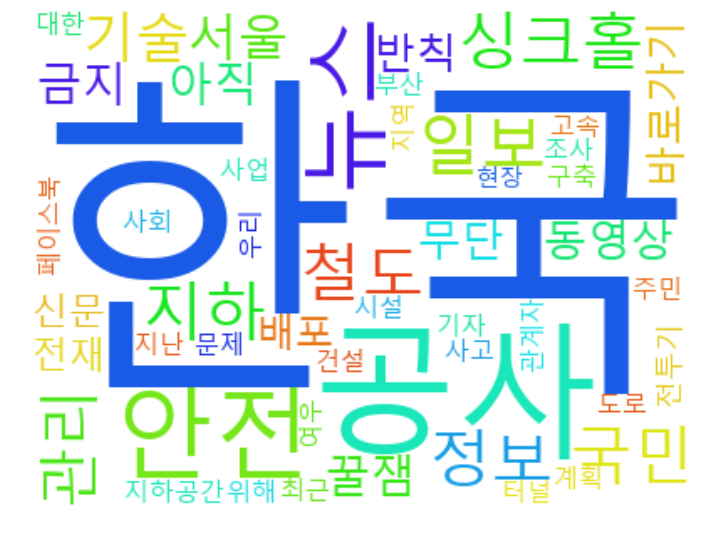

In [137]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [ ]:
# '전투기'는 제 2 롯데 월드 공사 과정에서 발생한 싱크홀 관련 기사에서 제 2 롯데 월드 인가를 위해 전투기 이착륙이 이루어지는 성남 비행장의
# 활주로 방향 변경등의 관련 기사가 많은 결과인 것으로 분석된다.
# '한국'은 싱크홀을 검사하는 '한국안전기술공단', 싱크홀 관련 긴급 점검을 실시한 '한국철도공단' 관련 기사가 많은 결과로 빈도수가 
# 높은 것으로 나타났다.
# 높은 빈도수를 가지는 단어와 '싱크홀'과 관계를 분석하기 위해서는 해당 단어와 '싱크홀'로 검색하여 기사 내용을 확인해 보면서 빈도수가 
# 높은 원인을 파악 할수 있었다. 

# 단어간 상관계수

In [138]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2558: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [139]:
word_corr

array([[ 1.        , -0.14561866,  0.27430061, ...,         nan,
        -0.17126345,  0.70629205],
       [-0.14561866,  1.        ,  0.04655404, ...,         nan,
         0.56887625, -0.07660942],
       [ 0.27430061,  0.04655404,  1.        , ...,         nan,
         0.02714626,  0.10016708],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.17126345,  0.56887625,  0.02714626, ...,         nan,
         1.        , -0.12508146],
       [ 0.70629205, -0.07660942,  0.10016708, ...,         nan,
        -0.12508146,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [140]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

상관계수 높은 순으로 정렬

In [141]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [142]:
edges = edges[:50]

In [143]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 상관관계 시각화

In [144]:
import networkx

In [145]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

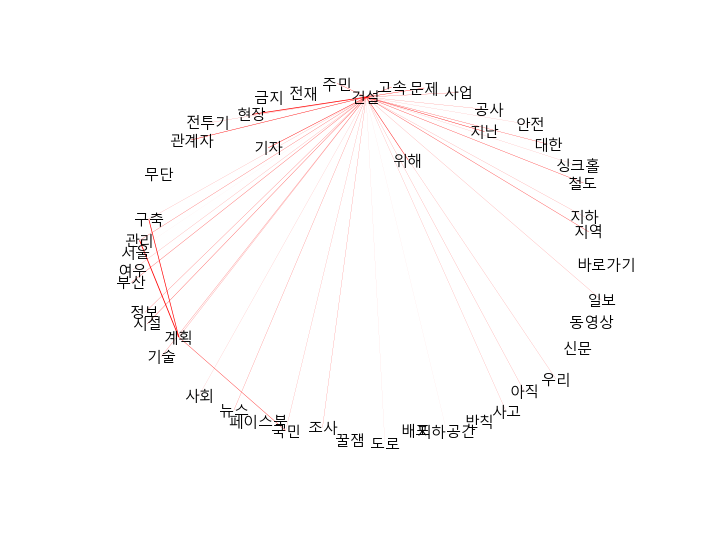

In [146]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='red')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [ ]:
 #한국일보 뉴스 스크래핑 (싱크홀)

In [153]:
import requests

In [154]:
import lxml.html

In [155]:
url = 'http://news.naver.com/main/search/search.nhn?rcnews=exist%3A038%3A469%3A&refresh=&so=datetime.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=1&rcsection=&query=%BD%CC%C5%A9%C8%A6&sm=all.basic&pd=1&startDate=&endDate={}'

In [173]:
articles2 = []
for page in range(1, 50):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.content)
    for article in element.xpath('.//div[@class="ct"]'):
        articles2.append([
                article.find('.//a[@class="tit"]').text,
                article.find('.//span[@class="time"]').text
            ])

In [174]:
import csv

In [175]:
articles = []
with open('news2.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerows(articles2)

In [181]:
import csv
news2 = []
with open('news2.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news2.append(row[0])

# 형태소 분석기

In [182]:
from konlpy.tag import Twitter

In [183]:
tagger = Twitter()

# Term-Document Matrix 만들기

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
cv2 = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [186]:
tdf2 = cv2.fit_transform(news2)

In [187]:
tdf2

<1225x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2940 stored elements in Compressed Sparse Row format>

# 단어 목록

In [188]:
words2 = cv2.get_feature_names()

In [189]:
words2

['값',
 '공사',
 '기고',
 '땅',
 '물',
 '불안',
 '신분당선',
 '아침',
 '안전',
 '압축',
 '어린이',
 '엔지니어링',
 '여행',
 '연',
 '연구',
 '예상',
 '오른',
 '와촌면',
 '완공',
 '우수',
 '원작',
 '월',
 '웹툰',
 '융합',
 '인공위성',
 '인천',
 '일',
 '일간',
 '저승',
 '절박',
 '지킴',
 '지하',
 '지하공간',
 '차',
 '참여',
 '채비',
 '철',
 '청소년',
 '추진',
 '탓',
 '터널',
 '통진',
 '특허',
 '평',
 '평택',
 '하수',
 '향상',
 '혁신도시',
 '현장',
 '호우']

# 한 글자 짜리 단어 빼기

In [190]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [191]:
cv2 = CountVectorizer(tokenizer=get_word, max_features=50)

In [192]:
tdf2 = cv2.fit_transform(news2)

In [193]:
tdf2

<1225x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2695 stored elements in Compressed Sparse Row format>

In [194]:
words2 = cv2.get_feature_names()

In [195]:
words2

['경마',
 '공사',
 '기고',
 '노후',
 '뉴스',
 '불안',
 '시민',
 '아침',
 '안전',
 '압축',
 '어린이',
 '엔지니어링',
 '여행',
 '연구',
 '예상',
 '오른',
 '와촌면',
 '완공',
 '우수',
 '원작',
 '웹툰',
 '융합',
 '인공위성',
 '인천',
 '일간',
 '저승',
 '전북',
 '절박',
 '제공권',
 '제작',
 '제주',
 '주민',
 '지반침하',
 '지킴',
 '지하',
 '지하공간',
 '참여',
 '채비',
 '청소년',
 '추진',
 '터널',
 '통진',
 '특허',
 '평택',
 '하수',
 '향상',
 '혁신도시',
 '현장',
 '호우',
 '화요일']

# 단어별 출현 빈도

In [196]:
import numpy

In [197]:
count_mat2 = tdf2.sum(axis=0)

In [198]:
count_mat2

matrix([[49, 98, 98, 49, 49, 98, 49, 49, 49, 49, 49, 49, 49, 98, 49, 49, 49,
         49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
         98, 98, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]], dtype=int64)

In [199]:
count2 = numpy.squeeze(numpy.asarray(count_mat2))

In [200]:
count2

array([49, 98, 98, 49, 49, 98, 49, 49, 49, 49, 49, 49, 49, 98, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       98, 98, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49], dtype=int64)

In [201]:
word_count2 = list(zip(words2, count2))

In [202]:
word_count2

[('경마', 49),
 ('공사', 98),
 ('기고', 98),
 ('노후', 49),
 ('뉴스', 49),
 ('불안', 98),
 ('시민', 49),
 ('아침', 49),
 ('안전', 49),
 ('압축', 49),
 ('어린이', 49),
 ('엔지니어링', 49),
 ('여행', 49),
 ('연구', 98),
 ('예상', 49),
 ('오른', 49),
 ('와촌면', 49),
 ('완공', 49),
 ('우수', 49),
 ('원작', 49),
 ('웹툰', 49),
 ('융합', 49),
 ('인공위성', 49),
 ('인천', 49),
 ('일간', 49),
 ('저승', 49),
 ('전북', 49),
 ('절박', 49),
 ('제공권', 49),
 ('제작', 49),
 ('제주', 49),
 ('주민', 49),
 ('지반침하', 49),
 ('지킴', 49),
 ('지하', 98),
 ('지하공간', 98),
 ('참여', 49),
 ('채비', 49),
 ('청소년', 49),
 ('추진', 49),
 ('터널', 49),
 ('통진', 49),
 ('특허', 49),
 ('평택', 49),
 ('하수', 49),
 ('향상', 49),
 ('혁신도시', 49),
 ('현장', 49),
 ('호우', 49),
 ('화요일', 49)]

# 빈도 순 정렬

In [203]:
import operator

In [204]:
sorted(word_count2, key=operator.itemgetter(1), reverse=True)

[('공사', 98),
 ('기고', 98),
 ('불안', 98),
 ('연구', 98),
 ('지하', 98),
 ('지하공간', 98),
 ('경마', 49),
 ('노후', 49),
 ('뉴스', 49),
 ('시민', 49),
 ('아침', 49),
 ('안전', 49),
 ('압축', 49),
 ('어린이', 49),
 ('엔지니어링', 49),
 ('여행', 49),
 ('예상', 49),
 ('오른', 49),
 ('와촌면', 49),
 ('완공', 49),
 ('우수', 49),
 ('원작', 49),
 ('웹툰', 49),
 ('융합', 49),
 ('인공위성', 49),
 ('인천', 49),
 ('일간', 49),
 ('저승', 49),
 ('전북', 49),
 ('절박', 49),
 ('제공권', 49),
 ('제작', 49),
 ('제주', 49),
 ('주민', 49),
 ('지반침하', 49),
 ('지킴', 49),
 ('참여', 49),
 ('채비', 49),
 ('청소년', 49),
 ('추진', 49),
 ('터널', 49),
 ('통진', 49),
 ('특허', 49),
 ('평택', 49),
 ('하수', 49),
 ('향상', 49),
 ('혁신도시', 49),
 ('현장', 49),
 ('호우', 49),
 ('화요일', 49)]

In [ ]:
# 네이버 기사와는 약간 상이한 결과를 보여 주고 있다.
# 특히 '불안', '노후' 단어가 자주 거론 된 것으로 나타났다.

# 워드 클라우드

In [205]:
%matplotlib inline

In [206]:
from wordcloud import WordCloud

In [207]:
from matplotlib import pyplot

In [208]:
wc2 = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud2 = wc2.generate_from_frequencies(word_count2)

화면에 표시

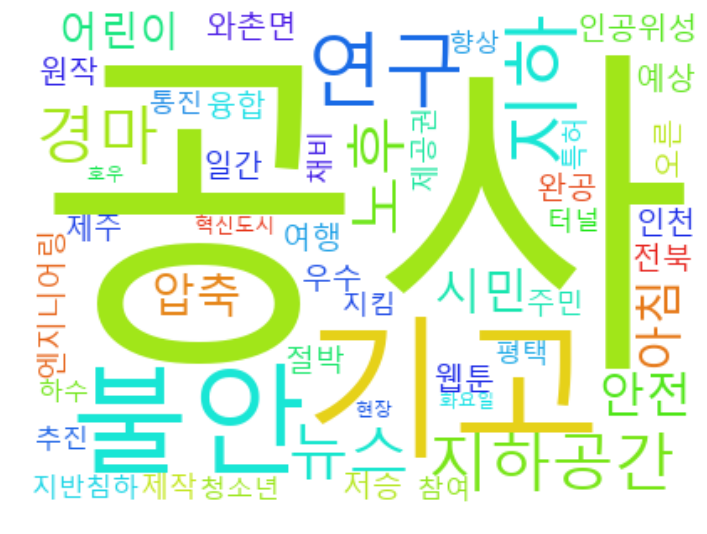

In [209]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud2)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [210]:
word_corr2 = numpy.corrcoef(tdf2.todense(), rowvar=0)

In [211]:
word_corr2

array([[ 1.        , -0.06019293, -0.06019293, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.06019293,  1.        , -0.08695652, ..., -0.06019293,
        -0.06019293, -0.06019293],
       [-0.06019293, -0.08695652,  1.        , ..., -0.06019293,
        -0.06019293, -0.06019293],
       ..., 
       [-0.04166667, -0.06019293, -0.06019293, ...,  1.        ,
        -0.04166667, -0.04166667],
       [-0.04166667, -0.06019293, -0.06019293, ..., -0.04166667,
         1.        , -0.04166667],
       [-0.04166667, -0.06019293, -0.06019293, ..., -0.04166667,
        -0.04166667,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [212]:
edges2 = []
for i in range(len(words2)):
    for j in range(i + 1, len(words2)):
        edges2.append((words2[i], words2[j], word_corr2[i, j]))

상관계수 높은 순으로 정렬

In [213]:
edges2 = sorted(edges2, key=operator.itemgetter(2), reverse=True)

In [214]:
edges2 = edges2[:50]

In [215]:
edge_list2 = [(word1, word2) for word1, word2, weight in edges2]
weight_list2 = [weight for word1, word2, weight in edges2]

# 상관관계 시각화

In [216]:
import networkx

In [217]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges2:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

* [spring layout](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout)
* [draw_networkx_nodes](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes)
* [draw_networkx_edges](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges)
* [draw_networkx_labels](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels)

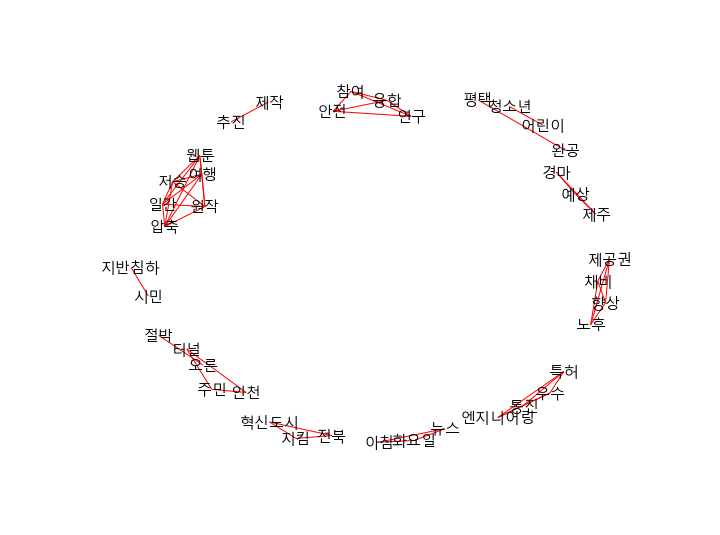

In [218]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list2, width=weight_list2, edge_color='red')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [44]:
# 웹툰에서 '싱크홀' 관련 하여 빈번하게 다루고 있어 이에 대한 연관 관계가 높은 것으로 나타났다.
# 웹툰에서 '싱크홀'에 관련해서 과도한 공포심을 발생시키는 스토리 전개가 이루어 짐으로 '싱크홀'의 위험성이 과도하게 어필 될수 있을 
# 것으로 판단된다.
# 제주도 경마에 있어서 '싱크홀'의 이름을 가지는 말이 있어 경마-예상-제주의 높은 상관도가 나타났다.
# 연관 관계를 더욱 정확하게 파악함에 있어 연관 단어를 동시에 검색하면 그 원인을 파악하는 것에 매우 도움이 되는 것을 알수 있었다.

In [ ]:
#한겨례 신문

In [4]:
import requests
import lxml.html
articles2=[]
url = 'http://news.naver.com/main/search/search.nhn?query=%BD%CC%C5%A9%C8%A6&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=rel.dsc&rcnews=exist:028:&rcsection=exist:&detail=1&pd=1&r_cluster2_start=1&r_cluster2_display=10&start=1&display=5&dnaSo=rel.dsc={}'
for page in range(1, 50):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.content)
    for article in element.xpath('.//div[@class="ct"]'):
        articles2.append([
                article.find('.//a[@class="tit"]').text,
                article.find('.//span[@class="time"]').text
            ])

In [222]:
import csv
news3=[]
with open('news3.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerows(articles2)

In [ ]:
# csv file combine

In [3]:
from glob import glob

with open('news.csv', 'a') as singleFile:
    for csv in glob('*.csv'):
        if csv == 'news.csv':
            pass
        else:
            for line in open(csv, 'r', encoding='utf8'):
                singleFile.write(line)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 2716: invalid start byte

In [ ]:
# 네이버 뉴스, 한국일보, 한겨례 신문 기사 결합 후 분석

In [4]:
totalnews=[]

In [5]:
import csv
with open('totalnews.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        totalnews.append(row[0])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 2716: invalid start byte

In [6]:
from konlpy.tag import Twitter

In [7]:
tagger = Twitter()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv3 = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [10]:
tdf3 = cv3.fit_transform(totalnews)

In [11]:
tdf3

<478x50 sparse matrix of type '<class 'numpy.int64'>'
	with 15483 stored elements in Compressed Sparse Row format>

In [12]:
words3 = cv3.get_feature_names()

In [13]:
words3

['개',
 '것',
 '계획',
 '고',
 '공사',
 '관리',
 '국민',
 '그',
 '금지',
 '기술',
 '기자',
 '꿀잼',
 '년',
 '뉴스',
 '동영상',
 '등',
 '며',
 '무단',
 '물',
 '및',
 '바로가기',
 '반칙',
 '배포',
 '사업',
 '사회',
 '서울',
 '수',
 '시',
 '신문',
 '싱크홀',
 '아직',
 '안전',
 '우리',
 '월',
 '이',
 '일',
 '일보',
 '재',
 '전',
 '전재',
 '전투기',
 '정보',
 '주민',
 '중',
 '지역',
 '지하',
 '지하공간',
 '철도',
 '페이스북',
 '한국']

In [14]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [15]:
cv3 = CountVectorizer(tokenizer=get_word, max_features=50)

In [16]:
tdf3 = cv3.fit_transform(totalnews)

In [17]:
tdf3

<478x50 sparse matrix of type '<class 'numpy.int64'>'
	with 12260 stored elements in Compressed Sparse Row format>

In [18]:
words3 = cv3.get_feature_names()

In [19]:
words3

['건설',
 '결과',
 '계획',
 '고속',
 '공사',
 '관계자',
 '관리',
 '구축',
 '국민',
 '금지',
 '기술',
 '기자',
 '꿀잼',
 '뉴스',
 '대한',
 '도로',
 '동영상',
 '무단',
 '문제',
 '바로가기',
 '반칙',
 '배포',
 '부산',
 '사고',
 '사업',
 '사회',
 '서울',
 '시설',
 '신문',
 '싱크홀',
 '아직',
 '안전',
 '여우',
 '우리',
 '일보',
 '전재',
 '전투기',
 '정보',
 '조사',
 '주민',
 '지난',
 '지역',
 '지하',
 '지하공간',
 '철도',
 '최근',
 '터널',
 '페이스북',
 '한국',
 '현장']

In [20]:
import numpy

In [21]:
count_mat3 = tdf3.sum(axis=0)

In [22]:
count_mat3

matrix([[ 280,  240,  340,  340, 1300,  340,  520,  300,  800,  478,  500,
          378,  478, 1015,  279,  320,  478,  478,  277,  478,  478,  478,
          260,  337,  440,  413,  498,  300,  478,  878,  498, 1240,  247,
          437,  976,  478,  480,  579,  340,  440,  300,  400,  600,  460,
          560,  340,  300,  478, 1354,  240]], dtype=int64)

In [23]:
count3 = numpy.squeeze(numpy.asarray(count_mat3))

In [24]:
count3

array([ 280,  240,  340,  340, 1300,  340,  520,  300,  800,  478,  500,
        378,  478, 1015,  279,  320,  478,  478,  277,  478,  478,  478,
        260,  337,  440,  413,  498,  300,  478,  878,  498, 1240,  247,
        437,  976,  478,  480,  579,  340,  440,  300,  400,  600,  460,
        560,  340,  300,  478, 1354,  240], dtype=int64)

In [25]:
word_count3 = list(zip(words3, count3))

In [26]:
word_count3

[('건설', 280),
 ('결과', 240),
 ('계획', 340),
 ('고속', 340),
 ('공사', 1300),
 ('관계자', 340),
 ('관리', 520),
 ('구축', 300),
 ('국민', 800),
 ('금지', 478),
 ('기술', 500),
 ('기자', 378),
 ('꿀잼', 478),
 ('뉴스', 1015),
 ('대한', 279),
 ('도로', 320),
 ('동영상', 478),
 ('무단', 478),
 ('문제', 277),
 ('바로가기', 478),
 ('반칙', 478),
 ('배포', 478),
 ('부산', 260),
 ('사고', 337),
 ('사업', 440),
 ('사회', 413),
 ('서울', 498),
 ('시설', 300),
 ('신문', 478),
 ('싱크홀', 878),
 ('아직', 498),
 ('안전', 1240),
 ('여우', 247),
 ('우리', 437),
 ('일보', 976),
 ('전재', 478),
 ('전투기', 480),
 ('정보', 579),
 ('조사', 340),
 ('주민', 440),
 ('지난', 300),
 ('지역', 400),
 ('지하', 600),
 ('지하공간', 460),
 ('철도', 560),
 ('최근', 340),
 ('터널', 300),
 ('페이스북', 478),
 ('한국', 1354),
 ('현장', 240)]

In [27]:
import operator

In [28]:
sorted(word_count3, key=operator.itemgetter(1), reverse=True)

[('한국', 1354),
 ('공사', 1300),
 ('안전', 1240),
 ('뉴스', 1015),
 ('일보', 976),
 ('싱크홀', 878),
 ('국민', 800),
 ('지하', 600),
 ('정보', 579),
 ('철도', 560),
 ('관리', 520),
 ('기술', 500),
 ('서울', 498),
 ('아직', 498),
 ('전투기', 480),
 ('금지', 478),
 ('꿀잼', 478),
 ('동영상', 478),
 ('무단', 478),
 ('바로가기', 478),
 ('반칙', 478),
 ('배포', 478),
 ('신문', 478),
 ('전재', 478),
 ('페이스북', 478),
 ('지하공간', 460),
 ('사업', 440),
 ('주민', 440),
 ('우리', 437),
 ('사회', 413),
 ('지역', 400),
 ('기자', 378),
 ('계획', 340),
 ('고속', 340),
 ('관계자', 340),
 ('조사', 340),
 ('최근', 340),
 ('사고', 337),
 ('도로', 320),
 ('구축', 300),
 ('시설', 300),
 ('지난', 300),
 ('터널', 300),
 ('건설', 280),
 ('대한', 279),
 ('문제', 277),
 ('부산', 260),
 ('여우', 247),
 ('결과', 240),
 ('현장', 240)]

In [ ]:
# 네이버 뉴스가 상대적으로 분량이 많아 네이버 뉴스와 한국일보, 한겨례 신문 기사를 합친 빈도 분석에 있어 네이버 뉴스의 빈도 분석과 
# 거의 동일한 결과가 나타났다.

In [29]:
%matplotlib inline

In [30]:
from wordcloud import WordCloud

In [31]:
from matplotlib import pyplot

In [32]:
wc3 = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud3 = wc3.generate_from_frequencies(word_count3)

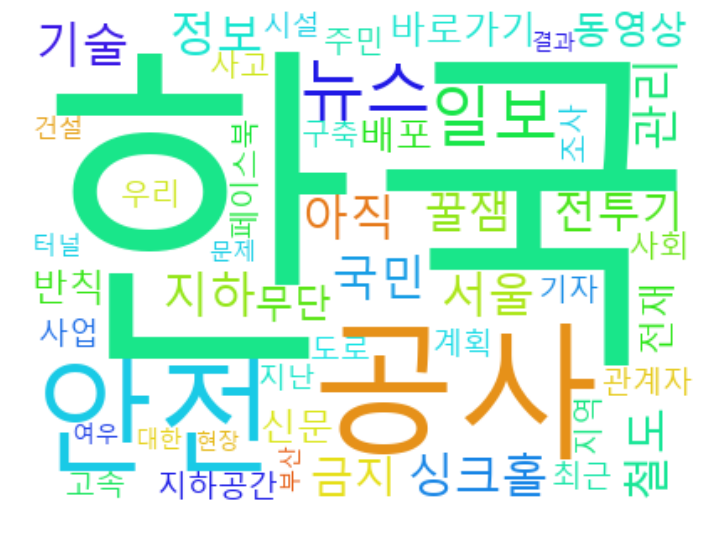

In [33]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud3)
pyplot.axis("off")
pyplot.show()

In [34]:
word_corr3 = numpy.corrcoef(tdf3.todense(), rowvar=0)

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2558: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [35]:
word_corr3

array([[ 1.        , -0.13771577, -0.14702823, ...,         nan,
        -0.1712974 ,  0.70597748],
       [-0.13771577,  1.        , -0.12495426, ...,         nan,
         0.04629394,  0.08427287],
       [-0.14702823, -0.12495426,  1.        , ...,         nan,
         0.57026763, -0.07778466],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.1712974 ,  0.04629394,  0.57026763, ...,         nan,
         1.        , -0.12504358],
       [ 0.70597748,  0.08427287, -0.07778466, ...,         nan,
        -0.12504358,  1.        ]])

In [36]:
edges3 = []
for i in range(len(words3)):
    for j in range(i + 1, len(words3)):
        edges3.append((words3[i], words3[j], word_corr3[i, j]))

In [37]:
edges3 = sorted(edges3, key=operator.itemgetter(2), reverse=True)

In [38]:
edges3 = edges3[:50]

In [39]:
edge_list3 = [(word1, word2) for word1, word2, weight in edges3]
weight_list3 = [weight for word1, word2, weight in edges3]

In [40]:
import networkx

In [41]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges3:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

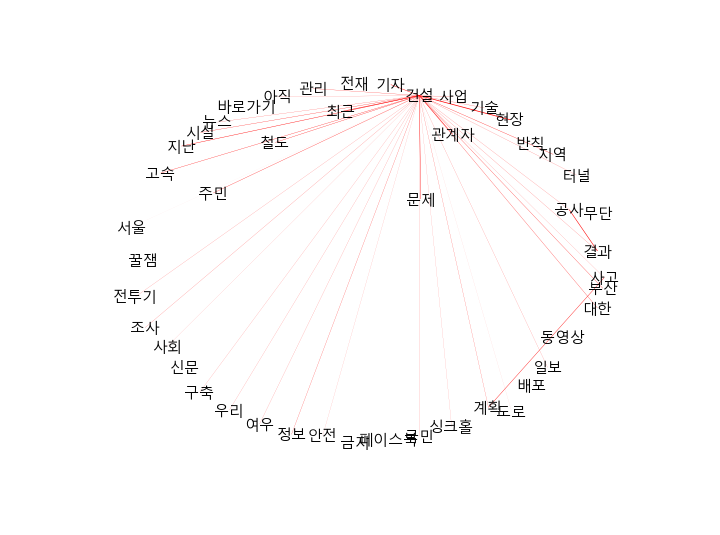

In [42]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list3, width=weight_list3, edge_color='red')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [1]:
# 결론
# 싱크홀에 관련된 기사를 분석한 결과 언론사 별로 예상 보다 높은 상이한 결과가 나타나는 것으로 분석되었다.
# 이에, 동일 사건에 있어서도 보도 형태에 따라 기사를 접하는 사람들이 느끼는 형태가 상이 할수 있음을 파악하였다.
# 동일 기간에 기사가 상대적으로 매우 많은 언론사에 의해 단어의 빈도수와 단어간 연관 관계 등이 결정되는 것을 확인하였다.
# 즉, 노출 빈도가 높은 언론사의 기사가 발생한 사건에 대한 이미지를 확정하는 확률이 높은 것으로 나타났다.
# 또한, 전투기와 '싱크홀'의 관계, 웹툰과 '싱크홀'의 관계처럼 단어의 높은 연관간계 분석에 있어서 해당 연관 단어와 간단한 검색으로 
# 높은 연관도의 원인을 파악 할수 있는 것을 확인하였다.
# 싱크홀의 위험성 등이 웹툰 등에 의해 과도하게 그려질 수 있는 것을 본 분석에서 확인되어 이러한 형태로 이미지의 부정화가 강화되는 부분에 
# 대한 대책 방안을 검토하는 것도 좋을 것으로 판단된다.
# '싱크홀'과 연관성이 높은 단어가 '공사' 인 점을 고려하여 '싱크홀'에 대한 막연한 두려움을 감소 시키기 위해서는 기획적으로 '공사' 
# 현장등에서 싱크홀 관련 대비를 철저히 한다는 내용등을 강조하는 기사를 게재하는 형태도 좋은 방법인 것으로 판단된다.